In [11]:
import pandas as pd

# Load the dataset
file_path = 'fire_data_FINAL_with_temp_AB_NB.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


FID SRC_AGENCY FIRE_ID   LATITUDE   LONGITUDE  YEAR  MONTH  DAY  \
0  187640         AB  MWF036  59.122133 -111.158783  2015      6    6   
1  187641         AB  MWF052  59.653100 -110.343233  2015      6   24   
2  187642         AB  MWF054  59.081333 -110.849717  2015      6   24   
3  187643         AB  MWF055  59.353500 -110.506667  2015      6   24   
4  187644         AB  MWF058  59.044483 -110.816367  2015      6   24   

              REP_DATE             OUT_DATE  ...  ECOZONE ECOZ_REF  \
0  2015-06-06 00:00:00  2015-06-06 00:00:00  ...        5       5a   
1  2015-06-24 00:00:00  2015-11-12 00:00:00  ...        5       5a   
2  2015-06-24 00:00:00  2015-06-24 00:00:00  ...        5       5a   
3  2015-06-24 00:00:00  2015-06-24 00:00:00  ...        5       5a   
4  2015-06-24 00:00:00  2015-06-24 00:00:00  ...        5       5a   

           ECOZ_NAME           ECOZ_NOM temperature_2m_max temperature_2m_min  \
0  Taiga Shield West  Taiga du Bouclier          27.174002          15.724000   
1  Taiga Shield West  Taiga du Bouclier          25.891500          13.291500   
2  Taiga Shield West  Taiga du Bouclier          25.838999          16.139000   
3  Taiga Shield West  Taiga du Bouclier          26.838999          14.488999   
4  Taiga Shield West  Taiga du Bouclier          25.414001          16.514000   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            22.261499                 24.440720                 15.001623   
1            19.318583                 24.207642                 11.377290   
2            21.130665                 24.421604                 14.919241   
3            20.266085                 25.232304                 12.811735   
4            21.103584                 23.975723                 15.334349   

   apparent_temperature_mean  
0                  19.889269  
1                  18.015505  
2                  19.695047  
3                  18.797403  
4                  19.768173  

[5 rows x 22 columns]

In [12]:
from datetime import datetime

# Convert REP_DATE and OUT_DATE to datetime objects
data['REP_DATE'] = pd.to_datetime(data['REP_DATE'])
data['OUT_DATE'] = pd.to_datetime(data['OUT_DATE'])

# Calculate the DURATION as the difference between OUT_DATE and REP_DATE
data['DURATION'] = (data['OUT_DATE'] - data['REP_DATE']).dt.days

# Display the first few rows to verify the new column
data.head()


FID SRC_AGENCY FIRE_ID   LATITUDE   LONGITUDE  YEAR  MONTH  DAY  \
0  187640         AB  MWF036  59.122133 -111.158783  2015      6    6   
1  187641         AB  MWF052  59.653100 -110.343233  2015      6   24   
2  187642         AB  MWF054  59.081333 -110.849717  2015      6   24   
3  187643         AB  MWF055  59.353500 -110.506667  2015      6   24   
4  187644         AB  MWF058  59.044483 -110.816367  2015      6   24   

    REP_DATE   OUT_DATE  ...  ECOZ_REF          ECOZ_NAME           ECOZ_NOM  \
0 2015-06-06 2015-06-06  ...        5a  Taiga Shield West  Taiga du Bouclier   
1 2015-06-24 2015-11-12  ...        5a  Taiga Shield West  Taiga du Bouclier   
2 2015-06-24 2015-06-24  ...        5a  Taiga Shield West  Taiga du Bouclier   
3 2015-06-24 2015-06-24  ...        5a  Taiga Shield West  Taiga du Bouclier   
4 2015-06-24 2015-06-24  ...        5a  Taiga Shield West  Taiga du Bouclier   

  temperature_2m_max temperature_2m_min temperature_2m_mean  \
0          27.174002          15.724000           22.261499   
1          25.891500          13.291500           19.318583   
2          25.838999          16.139000           21.130665   
3          26.838999          14.488999           20.266085   
4          25.414001          16.514000           21.103584   

   apparent_temperature_max  apparent_temperature_min  \
0                 24.440720                 15.001623   
1                 24.207642                 11.377290   
2                 24.421604                 14.919241   
3                 25.232304                 12.811735   
4                 23.975723                 15.334349   

   apparent_temperature_mean  DURATION  
0                  19.889269         0  
1                  18.015505       141  
2                  19.695047         0  
3                  18.797403         0  
4                  19.768173         0  

[5 rows x 23 columns]

In [13]:
data_dropped = data.drop(data.columns[:3], axis=1)
data_dropped = data_dropped.drop(['REP_DATE', 'OUT_DATE', 'ECOZ_NAME', 'ECOZ_NOM', 'ECOZ_REF'], axis=1)

# Separate rows where CAUSE == 'U' for prediction
data_predict = data_dropped[data_dropped['CAUSE'] == 'U']
data_train_test = data_dropped[data_dropped['CAUSE'].isin(['L', 'H'])]


print(data_train_test)

       LATITUDE   LONGITUDE  YEAR  MONTH  DAY   SIZE_HA CAUSE  ECOZONE  \
0     59.122133 -111.158783  2015      6    6      0.01     L        5   
1     59.653100 -110.343233  2015      6   24  24458.00     L        5   
2     59.081333 -110.849717  2015      6   24      0.01     L        5   
3     59.353500 -110.506667  2015      6   24      0.10     L        5   
4     59.044483 -110.816367  2015      6   24      0.01     L        5   
...         ...         ...   ...    ...  ...       ...   ...      ...   
7689  46.678600  -64.718600  2021     10    6      0.10     H        7   
7690  47.110280  -66.015330  2021     10   24      0.10     H        7   
7691  46.067330  -65.224580  2021     10   27      0.10     H        7   
7692  46.516360  -66.280280  2021     10   28      0.10     H        7   
7693  46.023520  -66.020140  2021     10   30      0.10     H        7   

      temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0              27.174002           15.7240

In [14]:
# remove outliers using isolation forest
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model, exclude the CAUSE column
isolation_forest.fit(data_train_test.drop('CAUSE', axis=1))

# Predict outliers
outliers = isolation_forest.predict(data_train_test.drop('CAUSE', axis=1))

# Remove outliers
data_train_test = data_train_test[outliers != -1]
print(data_train_test)


/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


       LATITUDE   LONGITUDE  YEAR  MONTH  DAY  SIZE_HA CAUSE  ECOZONE  \
0     59.122133 -111.158783  2015      6    6     0.01     L        5   
2     59.081333 -110.849717  2015      6   24     0.01     L        5   
3     59.353500 -110.506667  2015      6   24     0.10     L        5   
4     59.044483 -110.816367  2015      6   24     0.01     L        5   
5     59.043217 -110.740333  2015      6   24     0.01     L        5   
...         ...         ...   ...    ...  ...      ...   ...      ...   
7688  47.556150  -64.951770  2021     10    5     0.10     H        7   
7689  46.678600  -64.718600  2021     10    6     0.10     H        7   
7690  47.110280  -66.015330  2021     10   24     0.10     H        7   
7691  46.067330  -65.224580  2021     10   27     0.10     H        7   
7693  46.023520  -66.020140  2021     10   30     0.10     H        7   

      temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0              27.174002           15.724000          

In [15]:
from sklearn.model_selection import train_test_split

X = data_train_test.drop('CAUSE', axis=1)
y = data_train_test['CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the datasets
X_train.dtypes

LATITUDE                     float64
LONGITUDE                    float64
YEAR                           int64
MONTH                          int64
DAY                            int64
SIZE_HA                      float64
ECOZONE                        int64
temperature_2m_max           float64
temperature_2m_min           float64
temperature_2m_mean          float64
apparent_temperature_max     float64
apparent_temperature_min     float64
apparent_temperature_mean    float64
DURATION                       int64
dtype: object

In [16]:
X_test

LATITUDE   LONGITUDE  YEAR  MONTH  DAY  SIZE_HA  ECOZONE  \
6263  47.698720  -65.714670  2016      4   24     0.10        7   
5813  49.789520 -113.924280  2017      8   10     0.01       14   
3170  56.466767 -111.868517  2018      6   26     0.01        9   
3566  55.685967 -116.410917  2016      4   15     7.70        9   
5018  51.680247 -114.794813  2016      4   17     0.01        9   
...         ...         ...   ...    ...  ...      ...      ...   
1924  58.033533 -116.896463  2017      7   28     0.01        9   
4313  53.691483 -118.176733  2018      6   21     0.20        9   
5171  51.269350 -114.968533  2015      8    2     0.01       14   
4375  52.965133 -115.577233  2015      5   18     0.01        9   
6556  45.918950  -67.619770  2017      9   24     1.40        7   

      temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
6263            4.274500           -0.125500             1.845333   
5813           23.147499           11.847500            17.355833   
3170           17.580999           10.381001            14.310168   
3566           13.693500           -2.806500             4.768500   
5018           18.330500            0.880500             9.467999   
...                  ...                 ...                  ...   
1924           21.993500           13.293500            18.103916   
4313           21.119001           11.769000            16.273167   
5171           24.858000           10.808001            17.862167   
4375           15.369500            1.969500             8.844500   
6556           27.915001           14.115000            21.092083   

      apparent_temperature_max  apparent_temperature_min  \
6263                 -1.872895                 -6.899632   
5813                 22.733582                  9.124928   
3170                 14.712877                  8.589412   
3566                 10.178377                 -7.141676   
5018                 15.856552                 -3.515545   
...                        ...                       ...   
1924                 20.971653                 12.633411   
4313                 20.145119                  9.928472   
5171                 23.655619                  9.828900   
4375                 11.817865                 -2.351503   
6556                 30.670773                 14.202291   

      apparent_temperature_mean  DURATION  
6263                  -4.346604         0  
5813                  15.704322         0  
3170                  12.352330         0  
3566                   0.990986         2  
5018                   6.115434         4  
...                         ...       ...  
1924                  17.138494         0  
4313                  15.225495         0  
5171                  17.194918         0  
4375                   4.647863         0  
6556                  22.642073         5  

[2064 rows x 14 columns]

In [17]:
y_train

6992    H
3961    H
1444    H
5462    H
4005    H
       ..
4122    H
5653    H
5690    H
5864    H
980     H
Name: CAUSE, Length: 4814, dtype: object

In [18]:
y_test

6263    H
5813    H
3170    L
3566    H
5018    H
       ..
1924    H
4313    L
5171    H
4375    H
6556    H
Name: CAUSE, Length: 2064, dtype: object

In [19]:
# scale the data and build a random forest classifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Creating the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Creating the Grid Search Cross Validator
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected versi

({'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'auto',
  'n_estimators': 200},
 0.8876216259393829)

In [20]:
# build a random forest classifier with the best parameters
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train_scaled, y_train)

/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=200,
                       random_state=42)

In [21]:
# predict the cause of the fires
y_pred = rfc.predict(X_test_scaled)

In [22]:
# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

classification_report(y_test, y_pred, labels=['Lightning Caused Fires', 'Human Caused Fires'])


Accuracy Score:  0.9045542635658915
Confusion Matrix: 
 [[1263   91]
 [ 106  604]]
Classification Report: 
               precision    recall  f1-score   support

           H       0.92      0.93      0.93      1354
           L       0.87      0.85      0.86       710

    accuracy                           0.90      2064
   macro avg       0.90      0.89      0.89      2064
weighted avg       0.90      0.90      0.90      2064



/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/avimalhotr

'                        precision    recall  f1-score   support\n\nLightning Caused Fires       0.00      0.00      0.00         0\n    Human Caused Fires       0.00      0.00      0.00         0\n\n             micro avg       0.00      0.00      0.00         0\n             macro avg       0.00      0.00      0.00         0\n          weighted avg       0.00      0.00      0.00         0\n'

In [23]:
# predict the cause of the fires for data_predict
X_predict = data_predict.drop('CAUSE', axis=1)
X_predict_scaled = scaler.transform(X_predict)
y_predict = rfc.predict(X_predict_scaled)

/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


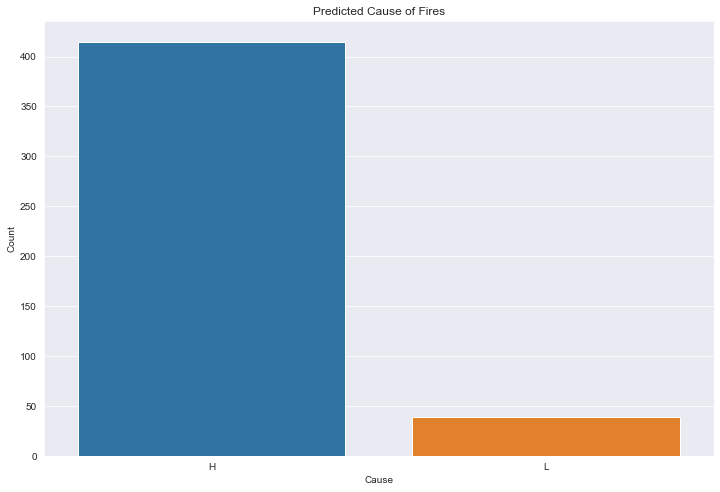

In [24]:
# visualize the predictions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(y_predict)
plt.title('Predicted Cause of Fires')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.show()

In [25]:
# feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rfc.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

                      Feature  Importance
0                    LATITUDE    0.155902
11   apparent_temperature_min    0.150092
12  apparent_temperature_mean    0.119877
8          temperature_2m_min    0.102263
9         temperature_2m_mean    0.099526
1                   LONGITUDE    0.077427
10   apparent_temperature_max    0.065253
7          temperature_2m_max    0.064617
4                         DAY    0.040004
3                       MONTH    0.038730
5                     SIZE_HA    0.027574
13                   DURATION    0.021165
2                        YEAR    0.019366
6                     ECOZONE    0.018204


In [26]:
import folium

# Filter the data for SRC_AGENCY being 'AB' or 'NB'
filtered_data = data[(data['SRC_AGENCY'] == 'AB') | (data['SRC_AGENCY'] == 'NB')]

# Further filter for causes 'H', 'L', and 'U'
causes = ['H', 'L', 'U']
filtered_data = filtered_data[filtered_data['CAUSE'].isin(causes)]


In [28]:
data_predict['PREDICTED_CAUSE'] = y_predict
#
# # Combine the original and predicted data for plotting
combined_data = pd.concat([data_train_test, data_predict])


/var/folders/t3/0dl4f5vn5vz1743r9_s9hd8m0000gn/T/ipykernel_13956/2144820815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_predict['PREDICTED_CAUSE'] = y_predict


In [29]:
import folium
from folium import FeatureGroup, LayerControl
import pandas as pd

# Initialize a new map centered around the average latitude and longitude
avg_lat = combined_data['LATITUDE'].mean()
avg_lon = combined_data['LONGITUDE'].mean()
folium_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)

# Add OpenStreetMap as a TileLayer
folium.TileLayer().add_to(folium_map)

# Function to determine circle color based on actual and predicted cause
def get_circle_color(actual_cause, predicted_cause):
    if actual_cause == 'H':
        return 'red'  # Actual cause is 'H'
    elif actual_cause == 'L':
        return 'blue'  # Actual cause is 'L'
    elif actual_cause == 'U' and pd.isnull(predicted_cause):
        return 'black'  # Unknown cause not predicted
    elif predicted_cause == 'H':
        return 'orange'  # Unknown cause predicted as 'H'
    elif predicted_cause == 'L':
        return 'green'  # Unknown cause predicted as 'L'

# Feature Groups for each category
fg_h = FeatureGroup(name='Human Caused Fires')
fg_l = FeatureGroup(name='Lightning Caused Fires')
fg_uh = FeatureGroup(name='Predicted Human Caused Fires')
fg_ul = FeatureGroup(name='Predicted Lightning Caused Fires')

# Add circles to their respective feature groups
for _, row in combined_data.iterrows():
    color = get_circle_color(row['CAUSE'], row.get('PREDICTED_CAUSE'))
    circle = folium.Circle(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=50,
        color=color,
        fill=True,
        fill_opacity=0.7
    )
    if row['CAUSE'] == 'H':
        circle.add_to(fg_h)
    elif row['CAUSE'] == 'L':
        circle.add_to(fg_l)
    elif row['CAUSE'] == 'U':
        if row.get('PREDICTED_CAUSE') == 'H':
            circle.add_to(fg_uh)
        elif row.get('PREDICTED_CAUSE') == 'L':
            circle.add_to(fg_ul)


# Add feature groups to the map
fg_h.add_to(folium_map)
fg_l.add_to(folium_map)
fg_uh.add_to(folium_map)
fg_ul.add_to(folium_map)

# Add layer control to manage the feature groups
LayerControl().add_to(folium_map)

# Display the map
folium_map


In [30]:
# save the map
folium_map.save("fire_causes_predicted_map.html")

In [31]:
print(combined_data[combined_data['CAUSE'] == 'U'])

       LATITUDE   LONGITUDE  YEAR  MONTH  DAY  SIZE_HA CAUSE  ECOZONE  \
172   58.646900 -115.188400  2015     10   10     0.90     U        4   
190   58.706167 -111.186500  2015      7   10     0.01     U        9   
276   58.478917 -116.344967  2015      7   18     0.10     U        9   
283   58.389236 -115.935335  2015      8   18     0.01     U        9   
295   57.840867 -117.650467  2015      4   23     2.40     U        9   
...         ...         ...   ...    ...  ...      ...   ...      ...   
7665  46.853700  -67.435820  2021      8    1     0.10     U        7   
7672  46.187820  -64.165370  2021      8   14     0.10     U        7   
7674  46.570120  -67.709420  2021      8   16     0.10     U        7   
7675  46.903750  -67.594350  2021      8   18     0.10     U        7   
7681  46.847770  -66.033400  2021      8   26     1.00     U        7   

      temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
172            10.072500            1.372500          

In [32]:
raw_data = pd.read_csv('fire_data.csv')

import folium
from folium import FeatureGroup, LayerControl
import pandas as pd

# Initialize a new map centered around the average latitude and longitude
avg_lat = raw_data['LATITUDE'].mean()
avg_lon = raw_data['LONGITUDE'].mean()
folium_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=6)

# Add OpenStreetMap as a TileLayer
folium.TileLayer().add_to(folium_map)

# Function to determine circle color based on actual and predicted cause
def get_circle_color(actual_cause, predicted_cause):
    if actual_cause == 'H':
        return 'red'  # Actual cause is 'H'
    elif actual_cause == 'L':
        return 'blue'  # Actual cause is 'L'
    elif actual_cause == 'U':
        return 'black'  # Unknown cause not predicted


# Feature Groups for each category
fg_h = FeatureGroup(name='Human Caused Fires', color='red')
fg_l = FeatureGroup(name='Lightning Caused Fires', color='blue')
fg_u = FeatureGroup(name='Unknown Cause', color='black')

# Add circles to their respective feature groups
for _, row in raw_data.iterrows():
    color = get_circle_color(row['CAUSE'], row.get('PREDICTED_CAUSE'))
    circle = folium.Circle(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=50,
        color=color,
        fill=True,
        fill_opacity=0.7
    )
    if row['CAUSE'] == 'H':
        circle.add_to(fg_h)
    elif row['CAUSE'] == 'L':
        circle.add_to(fg_l)
    elif row['CAUSE'] == 'U':
        circle.add_to(fg_u)

# Add feature groups to the map
fg_h.add_to(folium_map)
fg_l.add_to(folium_map)
fg_u.add_to(folium_map)

# add a legend showing the cause of the fires and add text to the legend
legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: 90px;
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b> Legend </b> <br>
     &nbsp; 'H' Cause &nbsp; <i class="fa fa-circle fa-1x" style="color:red"></i><br>
     &nbsp; 'L' Cause &nbsp; <i class="fa fa-circle fa-1x" style="color:blue"></i><br>
     &nbsp; 'U' Cause &nbsp; <i class="fa fa-circle fa-1x" style="color:black"></i>

</div>
'''

folium_map.get_root().html.add_child(folium.Element(legend_html))


# Add layer control to manage the feature groups
LayerControl().add_to(folium_map)

# Display the map
folium_map

# save the map
folium_map.save("fires_visual_map.html")


In [33]:
# build a neural network classifier
from sklearn.neural_network import MLPClassifier

# Defining the parameter grid
grid = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Creating the MLP Classifier
mlp = MLPClassifier(random_state=42)

# Creating the Grid Search Cross Validator
grid_search = GridSearchCV(estimator=mlp, param_grid=grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


({'activation': 'tanh',
  'alpha': 0.0001,
  'hidden_layer_sizes': (50, 100, 50),
  'learning_rate': 'constant',
  'solver': 'adam'},
 0.881806464984035)

In [34]:
# build a neural network classifier with the best parameters
mlp = MLPClassifier(**best_params, random_state=42)
mlp.fit(X_train_scaled, y_train)

# predict the cause of the fires
y_pred = mlp.predict(X_test_scaled)

# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.8987403100775194
Classification Report: 
               precision    recall  f1-score   support

           H       0.93      0.92      0.92      1354
           L       0.84      0.87      0.85       710

    accuracy                           0.90      2064
   macro avg       0.89      0.89      0.89      2064
weighted avg       0.90      0.90      0.90      2064



/Users/avimalhotra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
